## Installing KERAS

In [3]:
! pip install -q keras

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Installing Tensorflow

In [2]:
pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/53/a9/15a5a338160e5e598a0eef385aa29e0ad3a64d62957abdaaf9ed6349c452/tensorflow-2.5.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/60/7a/e881b5abb54db0e6e671ab088d079c57ce54e8a01a3ca443f561ccadb37e/typing_extensions-3.7.4.3-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Using cached https://files.pythonhosted.org/packages/44/f5/7feea02a3fb54d5db827ac4b822a7ba8933826b36de21880518250b8733a/tensorboard-2.5.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/82/f7/e43cefbe88c5fd371f4cf0cf5eb3feccd07515af9fd6cf7dbf1d1793a797/wrapt-1.12.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/eb/26/712e578c5f14e26ae3314c39a1bdc4eb2ec2f4ddc89b708cf8e0a0d20423/flatbuffers-1.12-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bc/19/404708a7e54ad2798907210462fd950c3442ea51acc8790f3da48d2bee8b/opt_einsum-3.3.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/23/47/835652c7e19530973c73c65e652fc53bd05725d5a7cf9bb8706777869c1e/absl_py-0.13.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/79/4c/7c3275a01e12ef9368a892926ab932b33bb13d55794881e3573482b378a7/Keras_Preprocessing-1.1.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a3/de/c

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [9]:
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'

## Importing VGG19 for pre trained weights and not including top and bottom layer

In [5]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 51s 1us/step


### The weights are already trained

In [6]:
for layer in vgg.layers:
    layer.trainable = False

Folders is a list containing the paths of all the output classes. In our case there are 2 outputs - parasitized and uninfected.

In [10]:
folders = glob('Dataset/Train/*')

In [11]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

second last layer weights are converted into a vector

In [12]:
x = Flatten()(vgg.output)

### Adding output layer i.e. softmax activation function

last layer is added after second last layer where length = length of folders list length, it's dense and with softmax activation.

In [13]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

Complete Structure of model

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Now the model is compiled where optimizer(algorithm that updates weights in order to reach the global minimum of loss function) is adam, loss is of type categorical_crossentropy(based on probability of occuring of that output) and matrix is of type accuracy.

In [15]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

ImageDataGenerator is a class in tensorflow responsible for labeling data to the name as of the folder in which it is present. It is also used for data augmentation and rescaling.

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [19]:
training_set

In [20]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


Now the model is trained on the trainig_set. Validation or test_set is also provided so that the error or accuracy on test_set is calculated after every epoch.

In [23]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
13/13 [==============================] - 83s 6s/step - loss: 0.1499 - accuracy: 0.9567 - val_loss: 0.3759 - val_accuracy: 0.7985
Epoch 2/20
13/13 [==============================] - 85s 7s/step - loss: 0.1449 - accuracy: 0.9591 - val_loss: 0.2099 - val_accuracy: 0.9403
Epoch 3/20
13/13 [==============================] - 92s 7s/step - loss: 0.1565 - accuracy: 0.9495 - val_loss: 0.3499 - val_accuracy: 0.7910
Epoch 4/20
13/13 [==============================] - 94s 7s/step - loss: 0.1400 - accuracy: 0.9591 - val_loss: 0.2276 - val_accuracy: 0.9328
Epoch 5/20
13/13 [==============================] - 90s 7s/step - loss: 0.1149 - accuracy: 0.9760 - val_loss: 0.3165 - val_accuracy: 0.8433
Epoch 6/20
13/13 [==============================] - 85s 7s/step - loss: 0.1256 - accuracy: 0.9688 - val_loss: 0.2632 - val_accuracy: 0.8955
Epoch 7/20
13/13 [==============================] - 85s 7s/step - loss: 0.1257 - accuracy: 0.9615 - val_loss: 0.2401 - val_accuracy: 0.9254
Epoch 8/20
13/13 [==

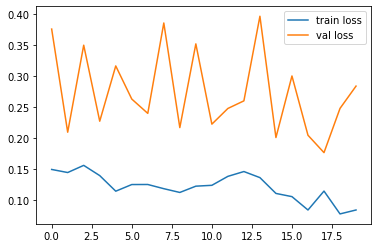

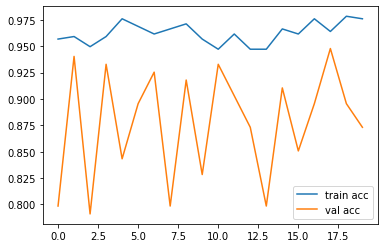

<Figure size 432x288 with 0 Axes>

In [24]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## Saving the trained model

In [25]:
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

### Predicting on test set

In [26]:
y_pred = model.predict(test_set)

In [27]:
y_pred

array([[6.80168152e-01, 3.19831878e-01],
       [9.69869375e-01, 3.01305521e-02],
       [9.98699069e-01, 1.30095065e-03],
       [7.73113593e-02, 9.22688603e-01],
       [8.06231499e-02, 9.19376910e-01],
       [9.97626841e-01, 2.37312750e-03],
       [1.53665245e-01, 8.46334755e-01],
       [4.38919663e-02, 9.56108034e-01],
       [2.28455752e-01, 7.71544278e-01],
       [8.05996209e-02, 9.19400334e-01],
       [3.92810144e-02, 9.60718989e-01],
       [9.99999762e-01, 2.72160747e-07],
       [5.83430640e-02, 9.41656947e-01],
       [2.01819986e-01, 7.98180044e-01],
       [8.30174506e-01, 1.69825464e-01],
       [4.86478597e-01, 5.13521433e-01],
       [6.37049556e-01, 3.62950444e-01],
       [9.75603104e-01, 2.43969634e-02],
       [9.11913872e-01, 8.80861953e-02],
       [1.03909917e-01, 8.96090150e-01],
       [1.08594730e-01, 8.91405225e-01],
       [7.09113777e-01, 2.90886283e-01],
       [2.58000106e-01, 7.41999865e-01],
       [2.72284616e-02, 9.72771585e-01],
       [6.274926

In [28]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [29]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

Image is imported from test set.

In [30]:
from tensorflow.keras.preprocessing import image
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))

The image which will be given as input is preprocessed

In [31]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [32]:
x.shape

(224, 224, 3)

In [33]:
x=x/255

In [34]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

loading model

In [36]:
from tensorflow.keras.models import load_model
model=load_model('model_vgg19.h5')

In [37]:
model.predict(img_data)

array([[0.00134487, 0.9986551 ]], dtype=float32)

In [39]:
a=np.argmax(model.predict(img_data), axis=1)

In [40]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
